

1.   Dataset load
2.   Data visualization
3.   Data pre-processing
4.   Data divide: X, y
5.   Scaling
6.   Splitting (train, test)
7.   Model Implementaion
8.   Evaluation



In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [9]:
dataset = pd.read_csv('car_price_prediction.csv')
dataset.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


## Data Visualization

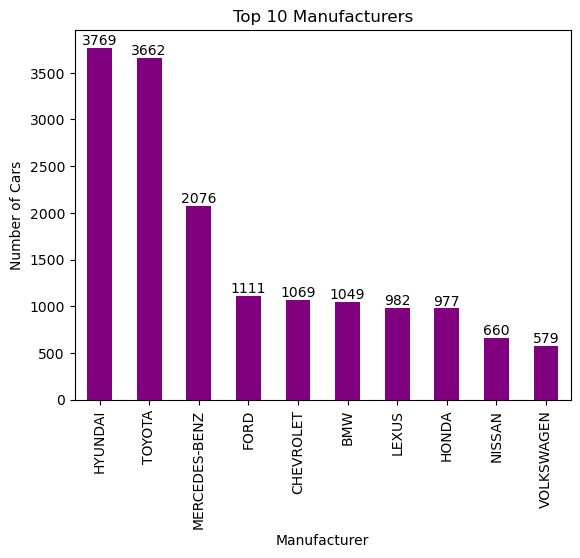

In [10]:
top_manufacturers = dataset['Manufacturer'].value_counts().sort_index().nlargest(10).plot(kind='bar', color='purple')

for p in top_manufacturers.patches:
    top_manufacturers.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.show()

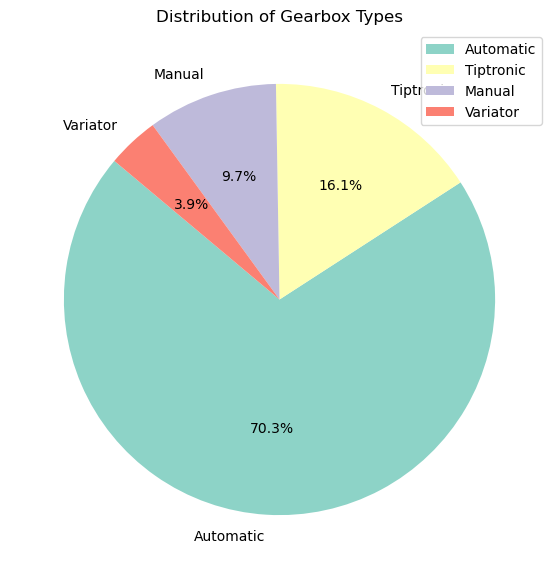

In [11]:
gearbox_count=dataset['Gear box type'].value_counts()
gearbox_count
plt.figure(figsize=(7, 7))
plt.pie(gearbox_count, labels=gearbox_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

plt.legend()
plt.title('Distribution of Gearbox Types')
plt.show()

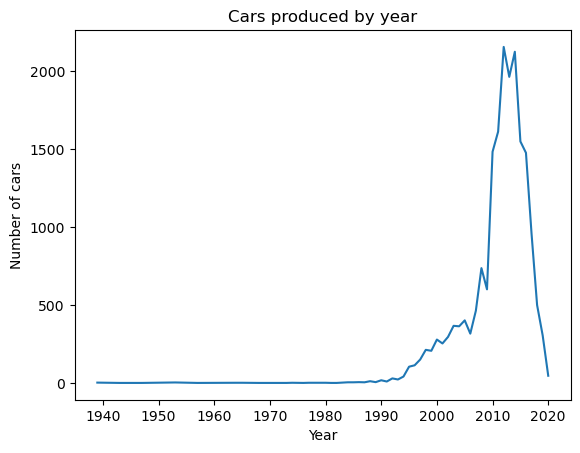

In [12]:
min_year= min(dataset['Prod. year'])
max_year= max(dataset['Prod. year'])
pr=dataset.groupby('Prod. year')['ID'].count().reset_index()
plt.plot(pr['Prod. year'],pr['ID'])
plt.title('Cars produced by year')
plt.xlabel('Year')
plt.ylabel('Number of cars')
plt.show()

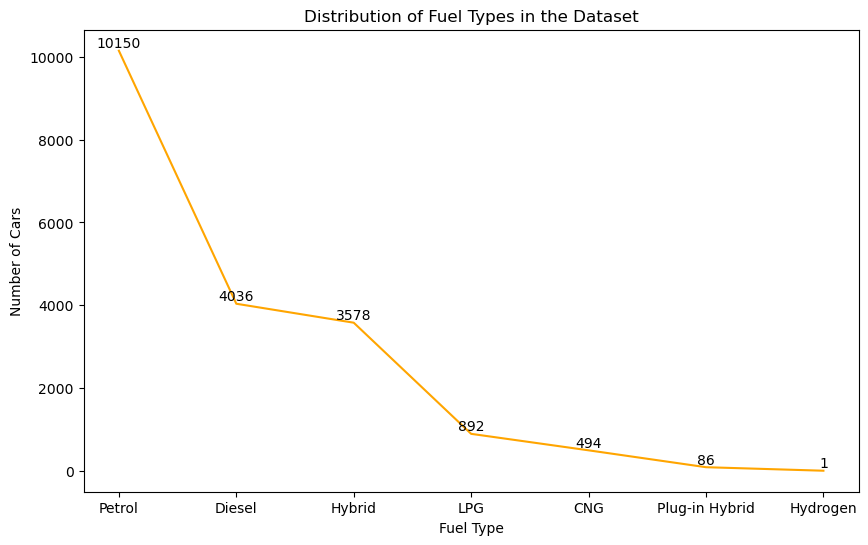

In [13]:
ft = dataset['Fuel type'].value_counts()

plt.figure(figsize=(10, 6))
ft.plot(kind='line', color='orange')

for i, value in enumerate(ft.values):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')

plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Fuel Types in the Dataset')
plt.show()

#Data Preprocessing

###Removing Null values / Handling Missing data

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [15]:
dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [16]:
dataset.shape

(19237, 18)

In [17]:
dataset.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [18]:
# Check for duplicate values
dataset.duplicated().sum()

313

In [19]:
# drop duplicate values
dataset.drop_duplicates(inplace= True)
print("Shape after removing duplicated values: ", dataset.shape)

Shape after removing duplicated values:  (18924, 18)


In [20]:
#Features unrelated to test
dataset = dataset.drop(['ID'], axis = 1)
dataset = dataset.drop(['Doors'], axis = 1)

###Feature Engineering

In [21]:
dataset['Mileage'].describe()

count     18924
unique     7687
top        0 km
freq        714
Name: Mileage, dtype: object

In [22]:
# Remove non-numeric characters and convert 'Mileage' to integers
dataset['Mileage'] = dataset['Mileage'].str.replace(' km', '').astype(int)


In [23]:
dataset['Category'].describe()

count     18924
unique       11
top       Sedan
freq       8600
Name: Category, dtype: object

In [24]:
#Encoding Category to integer type
unique_values = dataset['Category'].unique()

mapping = {value: index for index, value in enumerate(unique_values)}
dataset['Category'] = dataset['Category'].map(mapping)

dataset['Category'].describe()

count    18924.000000
mean         1.696523
std          1.725925
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Category, dtype: float64

In [25]:
dataset['Fuel type'].nunique()


7

In [26]:
unique_values1 = dataset['Fuel type'].unique()

mapping = {value: index for index, value in enumerate(unique_values1)}
dataset['Fuel type'] = dataset['Fuel type'].map(mapping)

dataset['Fuel type'].describe()

count    18924.000000
mean         1.274783
std          1.100968
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Fuel type, dtype: float64

In [27]:
dataset['Gear box type'].nunique()

4

In [28]:
unique_values1 = dataset['Gear box type'].unique()

mapping = {value: index for index, value in enumerate(unique_values1)}
dataset['Gear box type'] = dataset['Gear box type'].map(mapping)

dataset['Gear box type'].describe()

count    18924.000000
mean         0.531759
std          0.954548
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Gear box type, dtype: float64

In [29]:
dataset['Manufacturer'].nunique()

65

In [30]:
unique_values1 = dataset['Manufacturer'].unique()

mapping = {value: index for index, value in enumerate(unique_values1)}
dataset['Manufacturer'] = dataset['Manufacturer'].map(mapping)

dataset['Manufacturer'].describe()

count    18924.000000
mean         7.225111
std          6.981510
min          0.000000
25%          4.000000
50%          5.000000
75%          9.000000
max         64.000000
Name: Manufacturer, dtype: float64

In [31]:
dataset['Color'].nunique()

16

In [32]:
unique_values1 = dataset['Color'].unique()

mapping = {value: index for index, value in enumerate(unique_values1)}
dataset['Color'] = dataset['Color'].map(mapping)

dataset['Color'].describe()

count    18924.000000
mean         2.309026
std          2.560774
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: Color, dtype: float64

In [33]:
mapping1 = {'Yes': 1, 'No': 0}
dataset['Leather interior'] = dataset['Leather interior'].map(mapping1)

In [34]:
mapping2 = {'Left wheel': 1, 'Right-hand drive': 2}
dataset['Wheel'] = dataset['Wheel'].map(mapping2)

In [35]:
mapping3 = {'4x4': 1, 'Front': 2, 'Rear':3}
dataset['Drive wheels'] = dataset['Drive wheels'].map(mapping3)

In [36]:
dataset['Levy']= dataset['Levy'].replace("-", 0)
dataset = dataset[dataset['Levy'] != 0]

In [37]:
dataset = dataset[dataset['Price'] > 500]

In [38]:
#Turning Price to Price_category to make it a classifier data
min_price= min(dataset['Price'])
max_price= max(dataset['Price'])
print(min_price, max_price)


cheap= (max_price-min_price)*0.01
moderate= (max_price-min_price)*0.04
expensive= (max_price-min_price)*0.95

def categorize_price(price):
  if price<= cheap+ min_price:
    return 1
  elif price<= moderate+cheap+min_price :
    return 2
  else:
    return 3

dataset.loc[:, 'Price_Category'] = dataset['Price'].apply(categorize_price)

549 872946


In [39]:
dataset['Price_Category'].value_counts()

Price_Category
2    7348
1    3595
3    1001
Name: count, dtype: int64

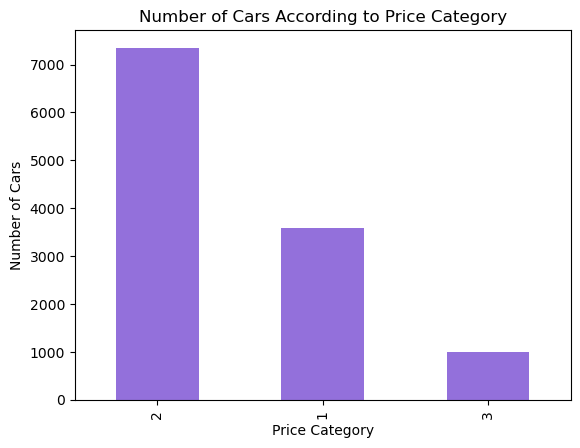

In [40]:
Price_Category = dataset['Price_Category'].value_counts().sort_index().nlargest(10).plot(kind='bar', color='mediumpurple')

for p in top_manufacturers.patches:
    top_manufacturers.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Number of Cars According to Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Cars')
plt.show()

In [41]:
dataset = dataset.drop(['Price'], axis = 1)

In [42]:
dataset['Engine volume'].nunique()

85

In [43]:
label_encoder= LabelEncoder()
dataset['Engine volume']= label_encoder.fit_transform(dataset['Engine volume'])
dataset['Model']= label_encoder.fit_transform(dataset['Model'])

In [44]:
dataset.head(3)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_Category
0,1399,0,622,2010,0,1,0,52,186005,6.0,0,1,1,0,12,2
1,1018,1,308,2011,0,0,1,47,192000,6.0,1,1,1,1,8,2
3,862,3,311,2011,0,1,0,37,168966,4.0,0,1,1,2,0,1


###Feature Selection

In [45]:
X1 = dataset.drop(columns=['Price_Category'])  # Features
y = dataset['Price_Category']  # Target

k_best_features = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_new = k_best_features.fit_transform(X1, y)

selected_feature_indices = k_best_features.get_support(indices=True)
selected_feature_names = X1.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)

dataset_selected_features = dataset.loc[:, selected_feature_names]
print(dataset_selected_features)

Selected feature names: Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Airbags'],
      dtype='object')
       Levy  Manufacturer  Model  Category  Fuel type  Engine volume  Mileage  \
0      1399             0    622         0          0             52   186005   
1      1018             1    308         0          1             47   192000   
3       862             3    311         0          0             37   168966   
4       446             2    326         1          1             13    91901   
5       891             4    641         0          2             27   160931   
...     ...           ...    ...       ...        ...            ...      ...   
19228  1850             6    269         2          2             52   122874   
19231  1055             6    269         2          2             52   107800   
19233   831             4    657         2          1             35   161600   
19

In [46]:
dataset.shape

(11944, 16)

##Train-Test split

In [66]:
y = dataset['Price_Category'].values
X = dataset_selected_features.values

# 70/30 split for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

##Scaling

At First, we will compare the accuracy for KNN model with and without scaling to determine whether we will need scaling or not.

In [48]:
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.68


In [49]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.82


### Here, we will perform standard scaling

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Correlation matrix

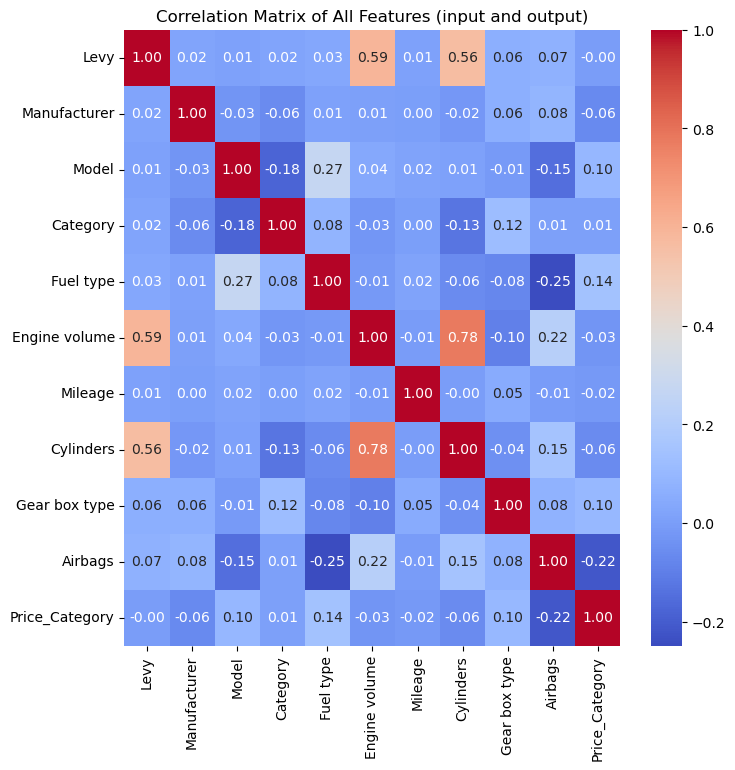

In [51]:
X_with_target = pd.concat([pd.DataFrame(X_train, columns=dataset_selected_features.columns), pd.DataFrame(y_train, columns=['Price_Category'])], axis=1)

correlation_matrix = X_with_target.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features (input and output)')
plt.show()

#Applying Classification models

1.   Decision Tree
2.   Random Forest
3.   K-nearest neighbors algorithm (KNN)

##1. Decision Tree

In [52]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)

accuracy1 = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy1:.2f}')


print(classification_report(y_test, Y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           1       0.81      0.81      0.81      1079
           2       0.88      0.88      0.88      2205
           3       0.66      0.65      0.65       300

    accuracy                           0.84      3584
   macro avg       0.78      0.78      0.78      3584
weighted avg       0.84      0.84      0.84      3584



### Visualization

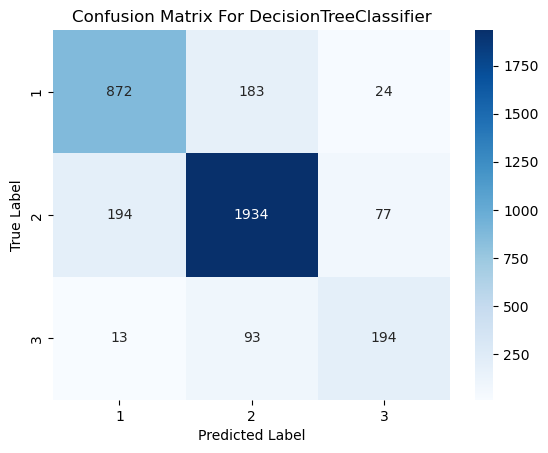

In [53]:

conf_matrix = confusion_matrix(y_test, Y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix For DecisionTreeClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

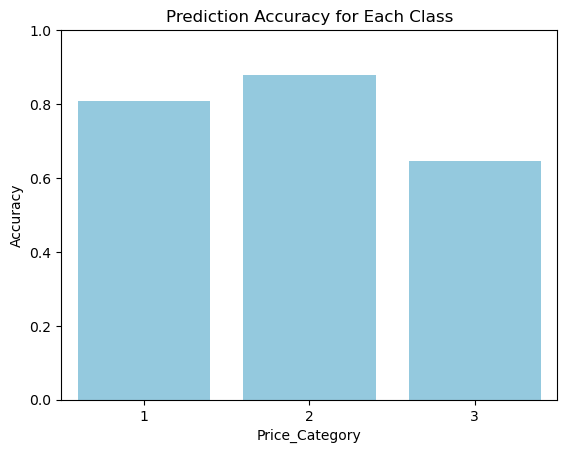

In [54]:
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Create a bar chart
sns.barplot(x=model.classes_, y=class_accuracy, color='skyblue')
plt.title('Prediction Accuracy for Each Class')
plt.xlabel('Price_Category')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentage
plt.show()

##2. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=800, random_state=42)
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)

accuracy2 = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy2:.2f}')


print(classification_report(y_test, Y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      1079
           2       0.90      0.91      0.90      2205
           3       0.76      0.67      0.71       300

    accuracy                           0.87      3584
   macro avg       0.83      0.81      0.82      3584
weighted avg       0.87      0.87      0.87      3584



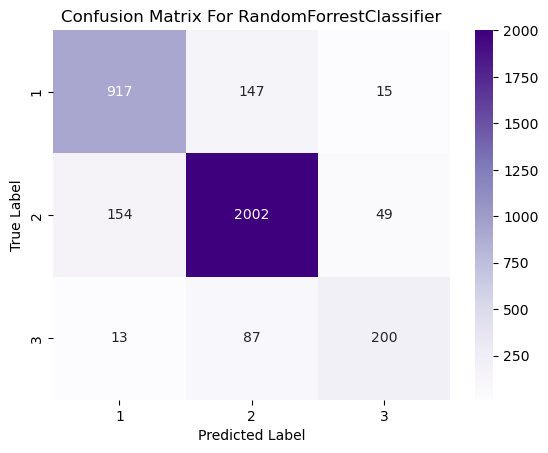

In [56]:
conf_matrix = confusion_matrix(y_test, Y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix For RandomForrestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

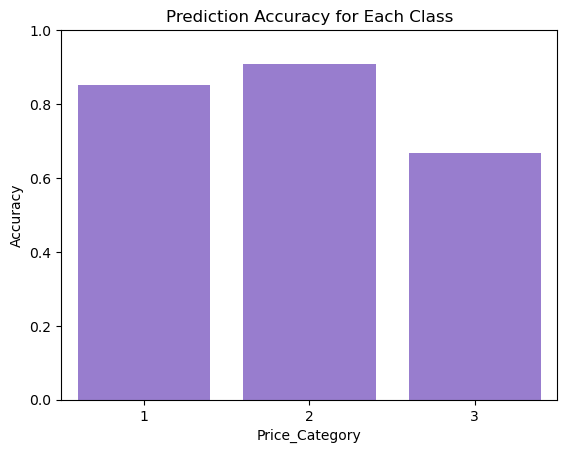

In [57]:
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

sns.barplot(x=model.classes_, y=class_accuracy, color='mediumpurple')
plt.title('Prediction Accuracy for Each Class')
plt.xlabel('Price_Category')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

##3. K-nearest neighbors algorithm (KNN)

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

Y_pred_knn = knn_model.predict(X_test)

accuracy3 = accuracy_score(y_test, Y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy3:.2f}')

print('Classification Report for K-Nearest Neighbors:')
print(classification_report(y_test, Y_pred_knn))

K-Nearest Neighbors Accuracy: 0.82
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           1       0.77      0.81      0.79      1079
           2       0.87      0.87      0.87      2205
           3       0.69      0.57      0.63       300

    accuracy                           0.82      3584
   macro avg       0.78      0.75      0.76      3584
weighted avg       0.82      0.82      0.82      3584



###Visualization

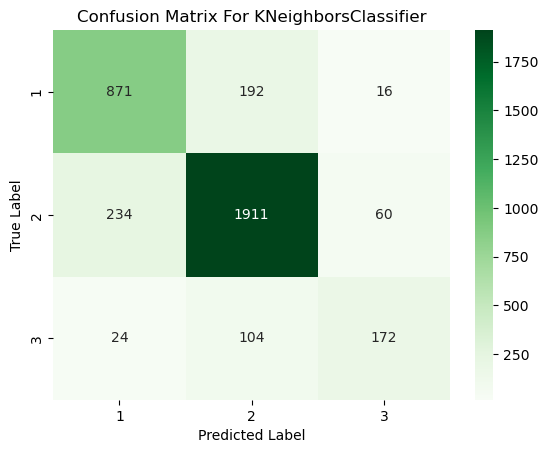

In [59]:
conf_matrix = confusion_matrix(y_test, Y_pred_knn)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix For KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

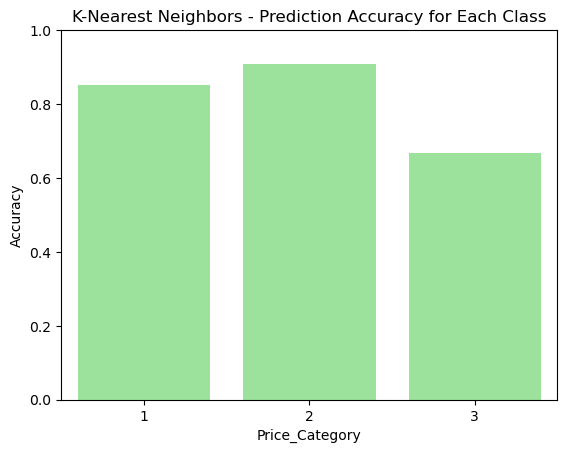

In [60]:
class_accuracy_knn = conf_matrix.diagonal() / conf_matrix.sum(axis=1)


sns.barplot(x=knn_model.classes_, y=class_accuracy, color='lightgreen')
plt.title('K-Nearest Neighbors - Prediction Accuracy for Each Class')
plt.xlabel('Price_Category')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

##Comparing the accuracy of the three models

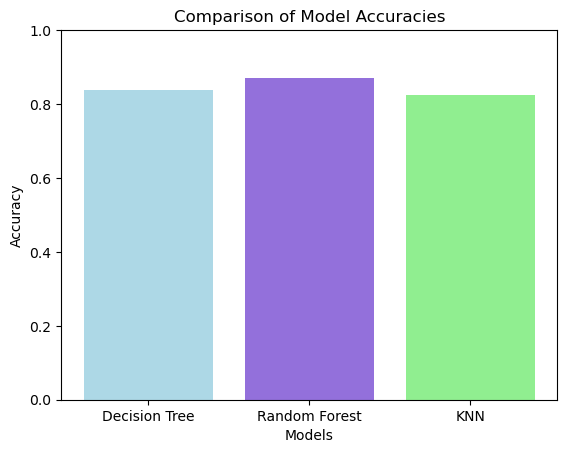

In [61]:
labels = ['Decision Tree', 'Random Forest', 'KNN']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.bar(labels, accuracies, color=['lightblue', 'mediumpurple', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()